In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
transaccions = pd.read_csv('csv/train_transaction.csv')
transaccions.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
identity = pd.read_csv('csv/train_identity.csv')
identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
for c in identity.columns:
    print ("columna %s \n" % c)
    print(identity[c].value_counts())

columna TransactionID 

3153916    1
3548654    1
3079669    1
3077620    1
3067379    1
          ..
3250108    1
3146453    1
3412695    1
3177178    1
3147777    1
Name: TransactionID, Length: 144233, dtype: int64
columna id_01 

-5.0     82170
 0.0     19555
-10.0    11257
-20.0    11211
-15.0     5674
         ...  
-47.0        1
-54.0        1
-86.0        1
-28.0        1
-57.0        1
Name: id_01, Length: 77, dtype: int64
columna id_02 

1102.0      11
696.0       10
1116.0       9
1117.0       9
1120.0       9
            ..
171228.0     1
342457.0     1
128226.0     1
118383.0     1
24576.0      1
Name: id_02, Length: 115655, dtype: int64
columna id_03 

 0.0     63903
 1.0       863
 3.0       668
 2.0       421
 5.0       109
 4.0       100
 6.0        64
-5.0        33
-6.0        31
-4.0        21
-7.0        21
-10.0       17
-8.0        14
-1.0        12
-2.0        12
-3.0         8
-11.0        6
-9.0         6
 7.0         4
-13.0        3
-12.0        3
 9.0      

In [6]:
identity['id_23'].value_counts()

IP_PROXY:TRANSPARENT    3489
IP_PROXY:ANONYMOUS      1071
IP_PROXY:HIDDEN          609
Name: id_23, dtype: int64

In [8]:
joined = transaccions.merge(identity,on='TransactionID')
joined

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,0,15810802,48.877,C,12019,305.0,106.0,mastercard,224.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,1,15810876,250.000,R,1214,174.0,150.0,visa,226.0,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,0,15810912,73.838,C,5096,555.0,185.0,mastercard,137.0,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,0,15810935,400.000,R,6019,583.0,150.0,visa,226.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [9]:
# Quiero mostrar como se relacionan los amaunts con los ips
data = joined[['id_23','TransactionAmt','isFraud']]
data

,id_23,TransactionAmt,isFraud
0,NaN,50.000,0
1,NaN,15.000,0
2,NaN,75.887,0
3,NaN,16.495,0
4,NaN,30.000,0
...,...,...,...
144228,NaN,48.877,0
144229,NaN,250.000,1
144230,NaN,73.838,0
144231,NaN,400.000,0


In [10]:
data.fillna('IP_PROXY:UNKOWN',inplace=True)

C:\Users\alejo\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [18]:
data = data.loc[data['TransactionAmt'] < 400]

Text(0.5, 0, 'Tipo de IP')

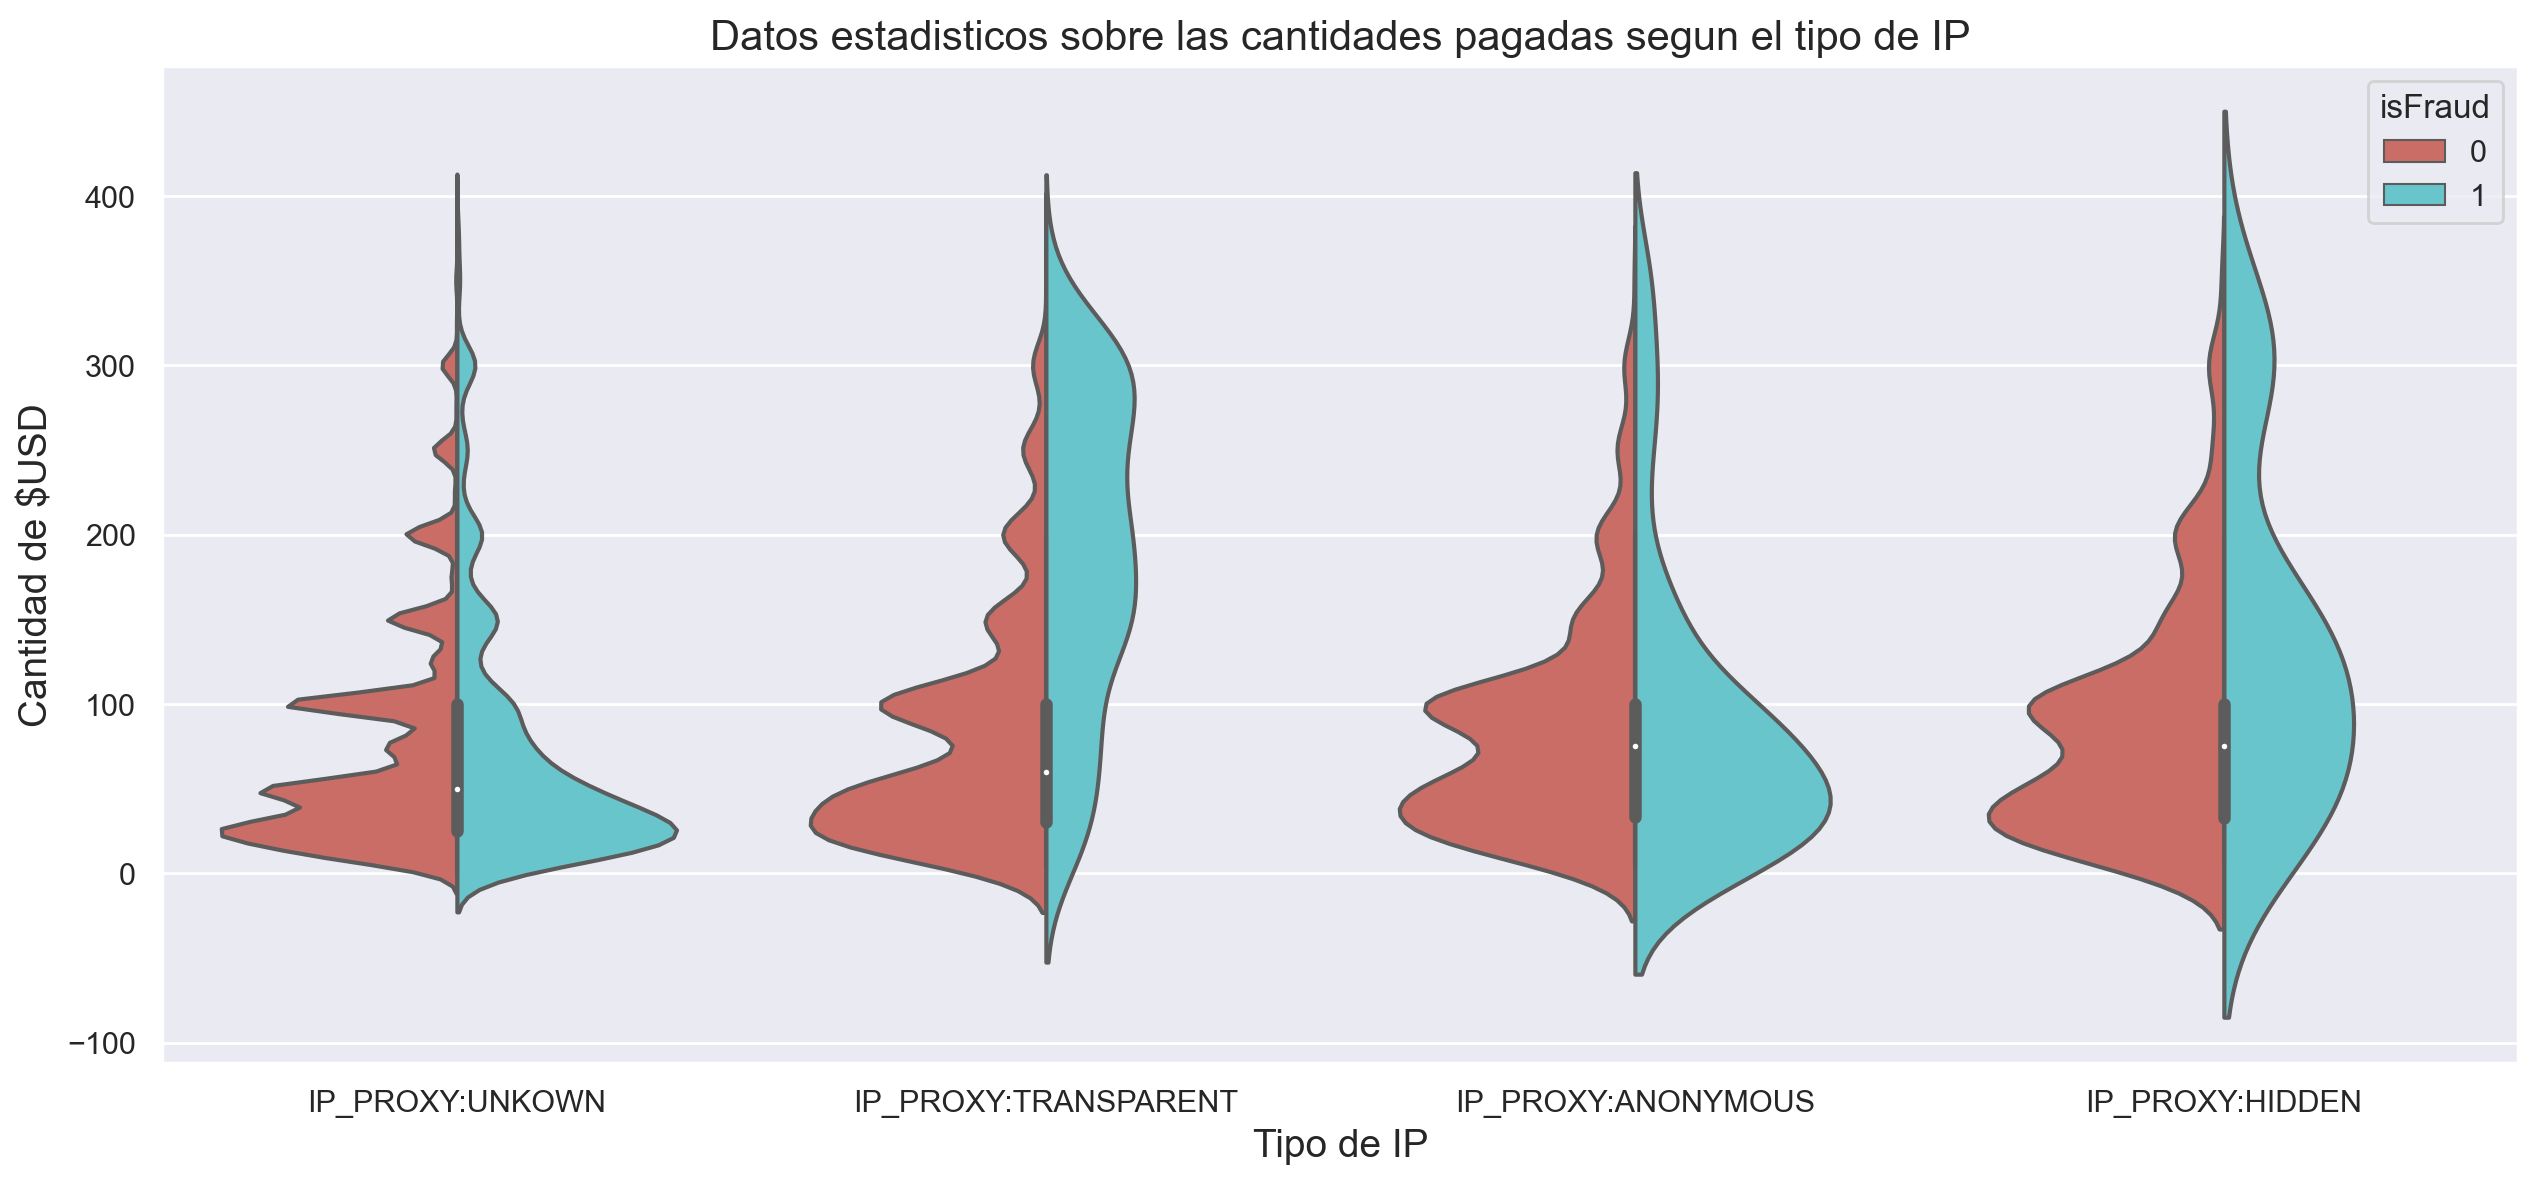

In [26]:
sns.set(rc={"figure.dpi":200,'figure.figsize':(15.2,6.6)})
ax = sns.violinplot(x="id_23", y="TransactionAmt",hue='isFraud', palette='hls',data=data,split=True)
ax.set_title("Datos estadisticos sobre las cantidades pagadas segun el tipo de IP",fontsize=15)
ax.set_ylabel("Cantidad de $USD",fontsize=14)
ax.set_xlabel("Tipo de IP",fontsize=14)